In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv("data/Salary_Data.csv")

In [3]:
X = ds["YearsExperience"].values
Y = ds["Salary"].values

In [4]:
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [5]:
Y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

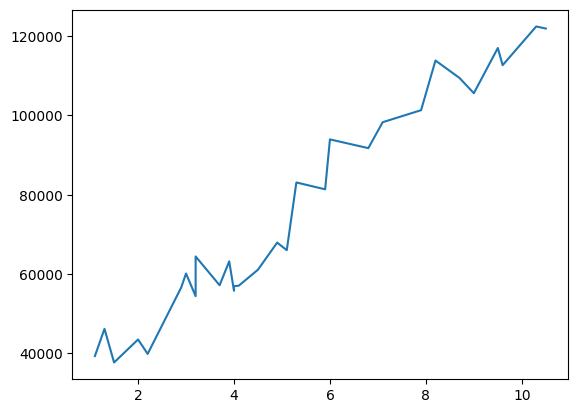

In [6]:
plt.plot(X,Y)

In [7]:
X = np.array(X)
Y = np.array(Y)

In [8]:
# Normalizing this dataset
def mean(X):
    return np.sum(X)/len(X)

In [9]:
def variance(X):
    mean_value = mean(X)
    return np.sum((X-mean_value)**2)/len(X)

In [10]:
def norm(X):
    mean_value = mean(X)
    variance_value = variance(X)
    return (X-mean_value)/np.sqrt(variance_value)

In [11]:
X_norm = norm(X)

In [12]:
X_norm

array([-1.51005294, -1.43837321, -1.36669348, -1.18749416, -1.11581443,
       -0.86493538, -0.82909552, -0.75741579, -0.75741579, -0.57821647,
       -0.50653674, -0.47069688, -0.47069688, -0.43485702, -0.29149756,
       -0.1481381 , -0.07645838, -0.00477865,  0.21026054,  0.2461004 ,
        0.53281931,  0.6403389 ,  0.92705781,  1.03457741,  1.21377673,
        1.32129632,  1.50049564,  1.5363355 ,  1.78721455,  1.85889428])

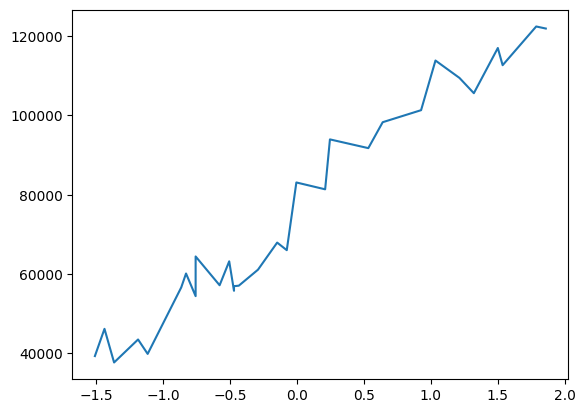

In [13]:
plt.plot(X_norm,Y)

In [14]:
import random

In [15]:
class SimpleR:
    def __init__(self, lr=0.1, max_iter=2000, threshold=1e-6):
        self.max_iter = max_iter
        self.lr = lr
        self.threshold = threshold
        self.weight = random.uniform(-1,1)
        self.bias = random.uniform(-1,1)

    def predict(self, X):
        return self.weight*X + self.bias
    
    def fit(self, X, Y):
        n = len(X)
        loss_history = []
        y_pred = self.predict(X)
        errors = Y-y_pred
        prev_loss = (1/(2*n)) * np.sum(errors**2)
        loss_history.append(prev_loss)

        for i in range(self.max_iter):
            w_grad = (1/n) * np.sum(errors*X)
            b_grad = (1/n) * np.sum(errors)
            self.weight += self.lr * w_grad
            self.bias += self.lr * b_grad
            y_pred = self.predict(X)
            errors = Y-y_pred
            curr_loss = 1/(2*n) * np.sum(errors**2)
            if np.abs(curr_loss - prev_loss) < self.threshold:
                break
            prev_loss = curr_loss
            loss_history.append(curr_loss)
        return loss_history

    def plot(self, X, Y):
        y_pred = self.predict(X)
        plt.plot(X,Y)
        plt.plot(X,y_pred)

In [16]:
model = SimpleR()

In [17]:
loss_history = model.fit(X_norm, Y)

In [18]:
loss_history

[np.float64(3251424841.724928),
 np.float64(2636624862.2108073),
 np.float64(2138636878.8043706),
 np.float64(1735266612.2451568),
 np.float64(1408536696.3321939),
 np.float64(1143885464.4426935),
 np.float64(929517966.6121984),
 np.float64(755880293.3694974),
 np.float64(615233778.0429096),
 np.float64(501310100.6283733),
 np.float64(409031921.922599),
 np.float64(334286597.17092204),
 np.float64(273742884.1220634),
 np.float64(224702476.55248797),
 np.float64(184979746.42113206),
 np.float64(152804335.01473364),
 np.float64(126742251.77555087),
 np.float64(105631964.3518129),
 np.float64(88532631.53858513),
 np.float64(74682171.95987056),
 np.float64(63463299.70111188),
 np.float64(54376013.17151738),
 np.float64(47015311.082545765),
 np.float64(41053142.39047879),
 np.float64(36223785.74990453),
 np.float64(32312006.871039353),
 np.float64(29143465.97915856),
 np.float64(26576947.8567351),
 np.float64(24498068.177572094),
 np.float64(22814175.637450114),
 np.float64(21450222.6799512

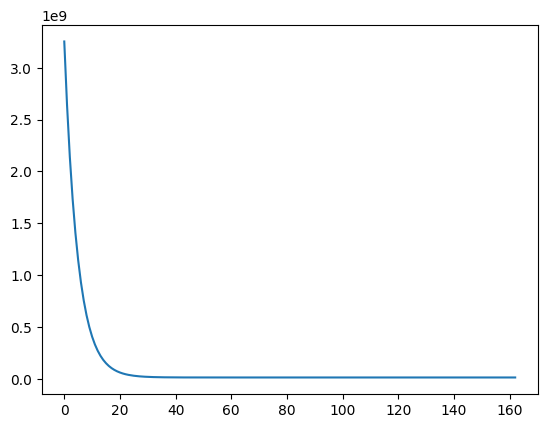

In [19]:
plt.plot(loss_history)

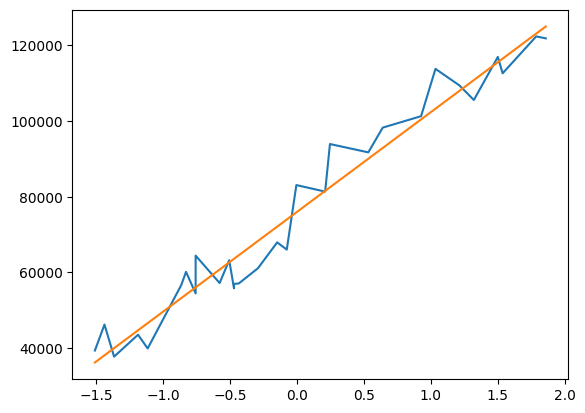

In [20]:
model.plot(X_norm, Y)

## Linear Regression from Scratch

The above implementation demonstrates **Linear Regression built from scratch**.

---

## Next Steps (For Learning Purpose)

In the next part, we will perform the following steps:

1. **Add a train–test split**
2. **Compute the R² score**
3. **Predict salary for new years of experience**
4. **Compare results with `sklearn`'s `LinearRegression` model**


In [21]:
def train_test_split(X, Y, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    test_count = int(len(X) * test_size)
    test_idx = indices[:test_count]
    train_idx = indices[test_count:]

    return X[train_idx], X[test_idx], Y[train_idx], Y[test_idx]

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y)

In [23]:
model = SimpleR(lr=0.1)
loss_history = model.fit(X_train, Y_train)

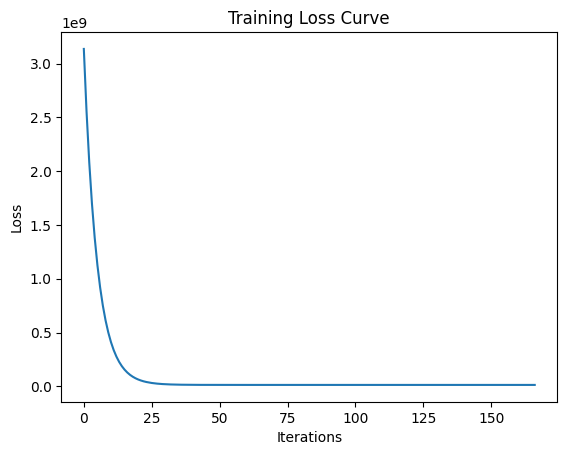

In [24]:
plt.plot(loss_history)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

In [25]:
Y_pred = model.predict(X_test)

In [26]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

mse_value = mse(Y_test, Y_pred)
mse_value

np.float64(49830112.78811132)

In [27]:
def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

rmse_value = rmse(Y_test, Y_pred)
rmse_value

np.float64(7059.044750397275)

In [28]:
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

r2 = r2_score(Y_test, Y_pred)
r2

np.float64(0.9024461462271149)

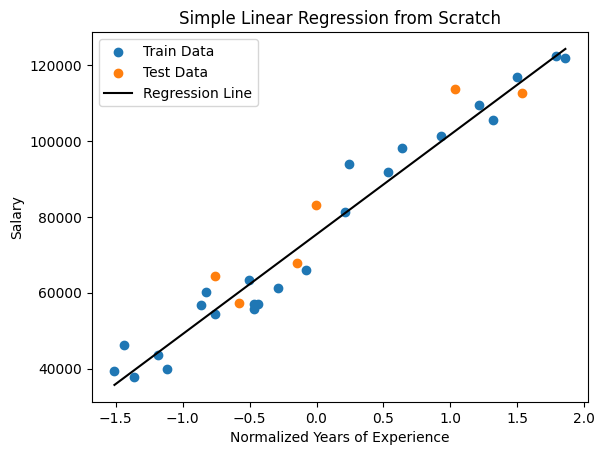

In [29]:
plt.scatter(X_train, Y_train, label="Train Data")
plt.scatter(X_test, Y_test, label="Test Data")
plt.plot(X_norm, model.predict(X_norm), color="black", label="Regression Line")
plt.legend()
plt.xlabel("Normalized Years of Experience")
plt.ylabel("Salary")
plt.title("Simple Linear Regression from Scratch")
plt.show()

In [30]:
X_mean = mean(X)
X_std = np.sqrt(variance(X))

def norm_with_params(X, mean, std):
    return (X - mean) / std

In [31]:
new_exp = np.array([5])
new_exp_norm = norm_with_params(new_exp, X_mean, X_std)
predicted_salary = model.predict(new_exp_norm)
predicted_salary

array([72440.65728734])

In [32]:
# Compare with sklearn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as sk_r2

sk_model = LinearRegression()
sk_model.fit(X_train.reshape(-1,1), Y_train)

sk_pred = sk_model.predict(X_test.reshape(-1,1))
sk_r2(Y_test, sk_pred)

0.9024461774180499